# TP3 - Exercise 1

## Mateus Ribeiro da Silva

In [207]:
#Importing some libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.stats import norm
from sklearn.utils import shuffle
from sklearn import neighbors
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [208]:
def dataset_fusion(A, B):

    """
    This function merge two datasets and sort them based on the value column
    """

    dataset = pd.merge(A, B, how='outer')
    dataset = dataset.sample(frac=1).reset_index(drop=True)

    return dataset 

In [209]:
#Creating datasets
np.random.seed(25)

dataset_A = pd.DataFrame({'Value 1': np.random.normal(loc=1, scale=1, size=(100,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=21, scale=0.5, size=(100,1)).flatten().tolist(),
                          'Dataset': ['A' for i in range(100)]})
dataset_B = pd.DataFrame({'Value 1': np.random.normal(loc=2, scale=0.5, size=(100,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=19, scale=1, size=(100,1)).flatten().tolist(),
                          'Dataset': ['B' for i in range(100)]})

In [210]:
#Visualizing dataset A
dataset_A.head()

,Value 1,Value 2,Dataset
0,1.228273,20.136173,A
1,2.026890,21.382034,A
2,0.160415,21.222657,A
3,0.408818,19.932212,A
4,0.043112,21.510182,A


In [211]:
#Dataset A parameters
dataset_A.describe()

,Value 1,Value 2
count,100.000000,100.000000
mean,0.948499,20.957059
std,1.089027,0.560371
min,-1.594487,19.475055
25%,0.339292,20.624909
50%,0.903735,20.915534
75%,1.512390,21.344130
max,3.822756,22.256809


In [212]:
#Visualizing dataset B
dataset_B.head()

,Value 1,Value 2,Dataset
0,2.675927,20.329898,B
1,2.557904,18.748862,B
2,1.484897,18.107330,B
3,1.777859,18.113393,B
4,2.028712,19.023848,B


In [213]:
#Dataset B parameters
dataset_B.describe()

,Value 1,Value 2
count,100.000000,100.000000
mean,2.018849,19.061622
std,0.498284,1.021648
min,0.723244,16.478130
25%,1.718632,18.454798
50%,2.018379,19.070621
75%,2.321576,19.726225
max,3.030904,22.774140


In [214]:
#Set the train dataset
dataset_train = dataset_fusion(dataset_A[:50], dataset_B[:50])
dataset_train.head()

,Value 1,Value 2,Dataset
0,2.933641,19.407319,B
1,1.226001,21.015489,A
2,1.076380,20.699139,A
3,1.484897,18.107330,B
4,2.531562,19.835699,B


In [215]:
#Set the test dataset
dataset_test = dataset_fusion(dataset_A[50:100], dataset_B[50:100])
dataset_test.head()

,Value 1,Value 2,Dataset
0,2.024652,19.983135,B
1,0.032745,21.153618,A
2,1.768936,21.266665,A
3,1.810857,19.467792,B
4,0.722439,20.358598,A


Accuracy: 0.94
Value 1 Predictive Value - Precision: 0.94
Value 2 Predictive Value - Precision: 0.94
Recall: 0.94
f-measure: 0.94


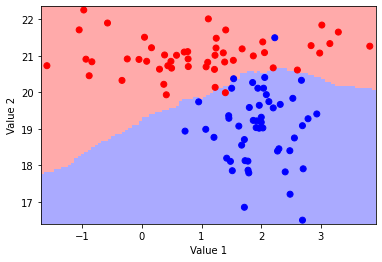

In [216]:
#Split the attributes and targets

columns_atrib = ['Value 1', 'Value 2']
column_target = 'Dataset'

X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

#Transform the targets in variables that can be used in classifier training
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#KNN classifier instance and training
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#Graphical settings
x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.axis('tight')

#Find predictions using the variables from test dataset
prediction = knn.predict(X_test)

#Compute confuse matrix using the predictions made and compared with y test.
cm = metrics.confusion_matrix(y_test, prediction)

#Compute some metrics
TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
accuracy = (TP+TN)/(TP+FP+FN+TN)
precision_value1 = TP/(TP+FP)
precision_value2 = TN/(FN+TN)
recall = TP/(TP+FN)
f_meas = (2*precision_value1*recall)/(precision_value1+recall)
print('Accuracy:', accuracy)
print('Value 1 Predictive Value - Precision:', precision_value1)
print('Value 2 Predictive Value - Precision:', precision_value2)
print('Recall:', recall)
print('f-measure:', f_meas)

### Considering 10 nearest neighbors, the model presented good performance metrics. Using predictions and comparing them with test dataset, we got 94% accuracy, 94% precision for each variable, and the f-measure is 94% too. In colormap, there is no regions that could have high sensibility, i.e, the classification frontier is cleary defined. This was expected, because the variables from datasets A and B are quite different, even the means are pretty close.

### Now, we are going to analyze the error performance through several k's and define what is the k which return to us the better classifier.

Best Accuracy: 0.97
Best number of k for Accuracy: 30
Best Error Rate: 0.03
Best number of k for Error Rate: 30


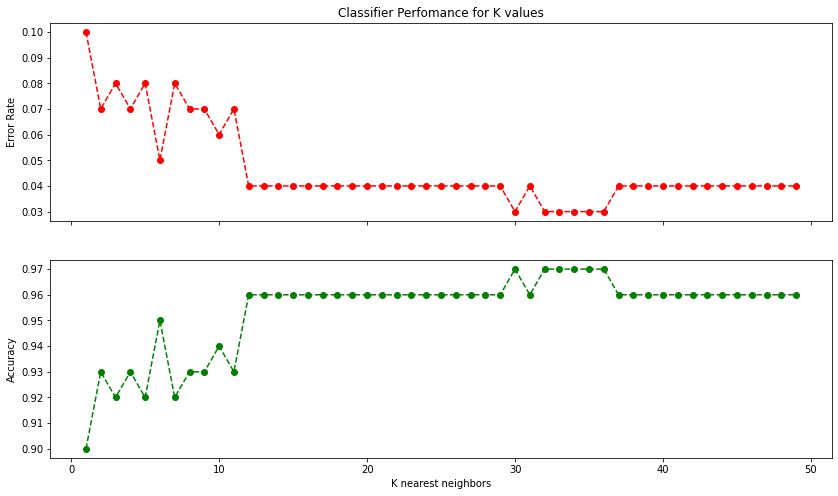

In [217]:
accuracy_list = []
f_measure_list = []
error_rate = []

for k in range(1, 50):

    #Knn instance and training
    knn = neighbors.KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    #Find predictions using variables from test dataset
    prediction = knn.predict(X_test)

    #Compute confuse matrix using the predictions made and compared with y test.
    cm = metrics.confusion_matrix(y_test, prediction)

    #Compute some metrics
    TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    accuracy_list.append(accuracy)

    error_rate.append(np.mean(prediction!=y_test))


fig, (a1, a2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
a1.plot(range(1, 50), error_rate, color='red', linestyle='dashed', marker='o')
a2.plot(range(1, 50), accuracy_list, color='green', linestyle='dashed', marker='o')
a1.set_title('Classifier Perfomance for K values')
a2.set_xlabel('K nearest neighbors')
a1.set_ylabel('Error Rate')
a2.set_ylabel('Accuracy')

print('Best Accuracy:', max(accuracy_list))
print('Best number of k for Accuracy:', accuracy_list.index(max(accuracy_list))+1)
print('Best Error Rate:', min(error_rate))
print('Best number of k for Error Rate:', error_rate.index(min(error_rate))+1)
    

### Analyzing the results, we got the best performance results for 30 neighbors analysis, using such value the classifier have 97% of accuracy and only 3% error rate, which is a great results. Taking a look in the plots obtained, we can see that after approximately 37/38 neighbors, classifier's performance remains the same, i.e, it does not matter how we increase the number of K neighbors, we won't get better results. Let's do an analysis about the size of training and test dataset, considering the best performance using 30 nearest neighbors...

Best Accuracy: 1.0
Best number of N for Accuracy: 76
Best Error Rate: 0.0
Best number of N for Error Rate: 76


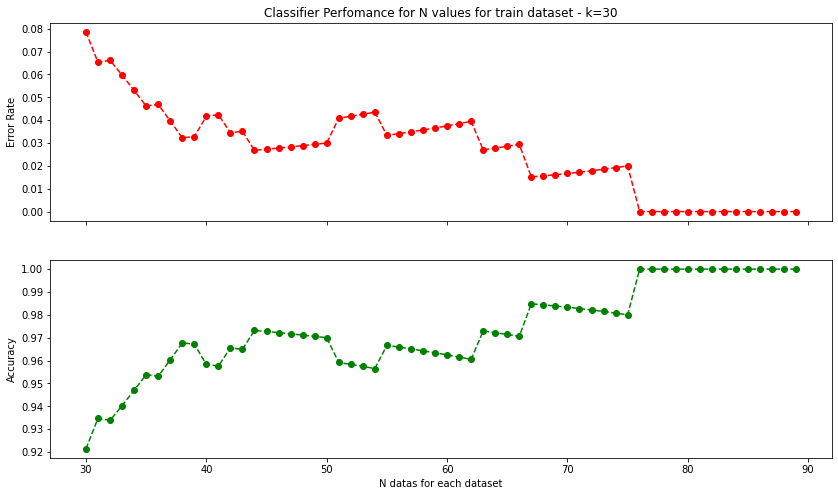

In [218]:
accuracy_list = []
f_measure_list = []
error_rate = []

#Total amount of rows from each dataset
N_total = 100

for N in range(30, 90):

    #Set the train dataset
    dataset_train = dataset_fusion(dataset_A[:N], dataset_B[:N])
    #Set the test dataset
    dataset_test = dataset_fusion(dataset_A.tail(N_total - N), dataset_B.tail(N_total - N))

    #Split the attributes and targets
    X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
    X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

    #Transform the targets in variables that can be used in classifier training
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)

    #Knn instance and training
    knn = neighbors.KNeighborsClassifier(n_neighbors = 30)
    knn.fit(X_train, y_train)

    #Find predictions using variables from test dataset
    prediction = knn.predict(X_test)

    #Compute confuse matrix using the predictions made and compared with y test.
    cm = metrics.confusion_matrix(y_test, prediction)

    #Compute some metrics
    TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    accuracy_list.append(accuracy)

    error_rate.append(np.mean(prediction!=y_test))


fig, (a1, a2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
a1.plot(range(30, 90), error_rate, color='red', linestyle='dashed', marker='o')
a2.plot(range(30, 90), accuracy_list, color='green', linestyle='dashed', marker='o')
a1.set_title('Classifier Perfomance for N values for train dataset - k=30')
a2.set_xlabel('N datas for each dataset')
a1.set_ylabel('Error Rate')
a2.set_ylabel('Accuracy')

print('Best Accuracy:', max(accuracy_list))
print('Best number of N for Accuracy:', accuracy_list.index(max(accuracy_list))+30)
print('Best Error Rate:', min(error_rate))
print('Best number of N for Error Rate:', error_rate.index(min(error_rate))+30)

### The best split encountered was 76 data of each dataset A and B (or can be analyzed as 76% of train dataset), and the test dataset was composed by residual data. Considering such split we got 100% of accuracy. When we take a look in metrics plot, after N=76 does not matter how we increase the train dataset, the accuracy and error rate remains the same. However, using k=30 and N=76, let's analyze others performance's metrics.

Accuracy: 1.0
Value 1 Predictive Value - Precision: 1.0
Value 2 Predictive Value - Precision: 1.0
Recall: 1.0
f-measure: 1.0


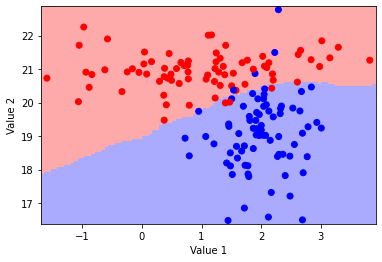

In [219]:
#Set the train dataset
dataset_train = dataset_fusion(dataset_A[:76], dataset_B[:76])
#Set the test dataset
dataset_test = dataset_fusion(dataset_A.tail(N_total - 76), dataset_B.tail(N_total - 76))

X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

#Transform the targets in variables that can be used in classifier training
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#KNN classifier instance and training
knn = neighbors.KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)

#Graphical settings
x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.axis('tight')

#Find predictions using the variables from test dataset
prediction = knn.predict(X_test)

#Compute confuse matrix using the predictions made and compared with y test.
cm = metrics.confusion_matrix(y_test, prediction)

#Compute some metrics
TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
accuracy = (TP+TN)/(TP+FP+FN+TN)
precision_value1 = TP/(TP+FP)
precision_value2 = TN/(FN+TN)
recall = TP/(TP+FN)
f_meas = (2*precision_value1*recall)/(precision_value1+recall)
print('Accuracy:', accuracy)
print('Value 1 Predictive Value - Precision:', precision_value1)
print('Value 2 Predictive Value - Precision:', precision_value2)
print('Recall:', recall)
print('f-measure:', f_meas)

### Through this configuration, we got 100% recall, 100% f-measure and 100% of precision in each predictive Value. Even the obtained results are great, we can't forget that the test dataset decrease, so the number of predictions are smaller too. So, let's consider a larger dataset with 76% destined for train and 24% for test, using k value of 30.

Text(0, 0.5, 'Accuracy')

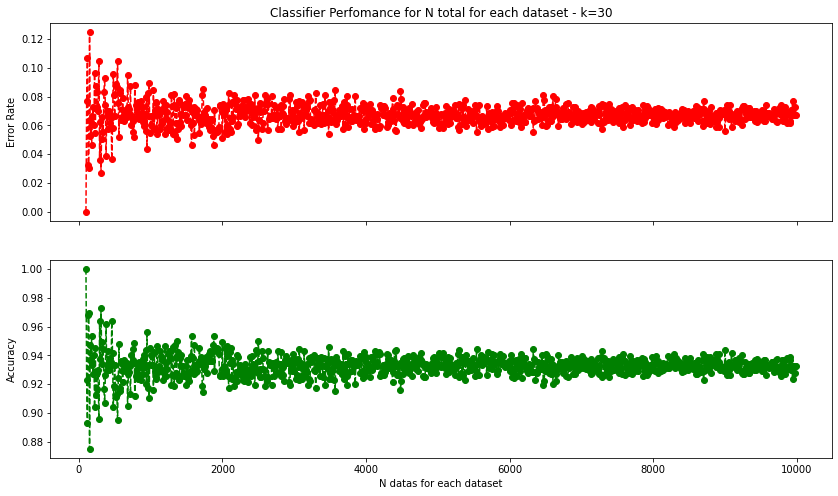

In [220]:
#Creating datasets
np.random.seed(25)

N_total = 500
perct_train = 0.76



accuracy_list = []
f_measure_list = []
error_rate = []


for N in range(100, 10000, 10):

    dataset_A = pd.DataFrame({'Value 1': np.random.normal(loc=1, scale=1, size=(N,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=21, scale=0.5, size=(N,1)).flatten().tolist(),
                          'Dataset': ['A' for i in range(N)]})
    dataset_B = pd.DataFrame({'Value 1': np.random.normal(loc=2, scale=0.5, size=(N,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=19, scale=1, size=(N,1)).flatten().tolist(),
                          'Dataset': ['B' for i in range(N)]})

    #Set the train dataset
    dataset_train = dataset_fusion(dataset_A[:int(N*perct_train)], dataset_B[:int(N*perct_train)])
    #Set the test dataset
    dataset_test = dataset_fusion(dataset_A.tail(int(N*(1 - perct_train))), dataset_B.tail(int(N*(1 - perct_train))))

    #Split the attributes and targets
    X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
    X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

    #Transform the targets in variables that can be used in classifier training
    le = LabelEncoder()
    y_train = le.fit_transform(y_train)
    y_test = le.fit_transform(y_test)

    #Knn instance and training
    knn = neighbors.KNeighborsClassifier(n_neighbors = 30)
    knn.fit(X_train, y_train)

    #Find predictions using variables from test dataset
    prediction = knn.predict(X_test)

    #Compute confuse matrix using the predictions made and compared with y test.
    cm = metrics.confusion_matrix(y_test, prediction)

    #Compute some metrics
    TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
    accuracy = (TP+TN)/(TP+FP+FN+TN)
    accuracy_list.append(accuracy)

    error_rate.append(np.mean(prediction!=y_test))


fig, (a1, a2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)
a1.plot(range(100, 10000, 10), error_rate, color='red', linestyle='dashed', marker='o')
a2.plot(range(100, 10000, 10), accuracy_list, color='green', linestyle='dashed', marker='o')
a1.set_title('Classifier Perfomance for N total for each dataset - k=30')
a2.set_xlabel('N datas for each dataset')
a1.set_ylabel('Error Rate')
a2.set_ylabel('Accuracy')

### As we could expect, as dataset becomes larger the performance's metrics decrease too until trend to mean value of accuracy and error rate. For the purposed problem, the dataset trend to remains in 94/92% of accuracy and 6/8% error rate as we increase dataset's size. Using more data, give us more confidence in dataset results, however, the computational cost increases considerably as larger as the dataset's size.

### Let's consider now one more variable and classifier's performance for the following parameters: k=30, percentage_train = 0.76, N = 5000.  

In [224]:
N = 5000
perct_train = 0.76


dataset_A = pd.DataFrame({'Value 1': np.random.normal(loc=1, scale=1, size=(N,1)).flatten().tolist(),
                        'Value 2': np.random.normal(loc=21, scale=0.5, size=(N,1)).flatten().tolist(),
                        'Value 3': np.random.normal(loc=7, scale=0.5, size=(N,1)).flatten().tolist(),
                        'Dataset': ['A' for i in range(N)]})
dataset_B = pd.DataFrame({'Value 1': np.random.normal(loc=2, scale=0.5, size=(N,1)).flatten().tolist(),
                        'Value 2': np.random.normal(loc=19, scale=1, size=(N,1)).flatten().tolist(),
                        'Value 3': np.random.normal(loc=9, scale=0.5, size=(N,1)).flatten().tolist(),
                        'Dataset': ['B' for i in range(N)]})

#Set the train dataset
dataset_train = dataset_fusion(dataset_A[:int(N*perct_train)], dataset_B[:int(N*perct_train)])
#Set the test dataset
dataset_test = dataset_fusion(dataset_A.tail(int(N*(1 - perct_train))), dataset_B.tail(int(N*(1 - perct_train))))

#Split the attributes and targets
X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

#Transform the targets in variables that can be used in classifier training
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#Knn instance and training
knn = neighbors.KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

#Find predictions using variables from test dataset
prediction = knn.predict(X_test)

#Compute confuse matrix using the predictions made and compared with y test.
cm = metrics.confusion_matrix(y_test, prediction)

#Compute some metrics
TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
accuracy = (TP+TN)/(TP+FP+FN+TN)
precision_value1 = TP/(TP+FP)
precision_value2 = TN/(FN+TN)
recall = TP/(TP+FN)
f_meas = (2*precision_value1*recall)/(precision_value1+recall)
print('Accuracy:', accuracy)
print('Error Rate:', np.mean(prediction!=y_test))

Accuracy: 0.9320833333333334
Error Rate: 0.06791666666666667


In [225]:
N = 5000
perct_train = 0.76


dataset_A = pd.DataFrame({'Value 1': np.random.normal(loc=1, scale=1, size=(N,1)).flatten().tolist(),
                        'Value 2': np.random.normal(loc=21, scale=0.5, size=(N,1)).flatten().tolist(),
                        'Dataset': ['A' for i in range(N)]})
dataset_B = pd.DataFrame({'Value 1': np.random.normal(loc=2, scale=0.5, size=(N,1)).flatten().tolist(),
                        'Value 2': np.random.normal(loc=19, scale=1, size=(N,1)).flatten().tolist(),
                        'Dataset': ['B' for i in range(N)]})

#Set the train dataset
dataset_train = dataset_fusion(dataset_A[:int(N*perct_train)], dataset_B[:int(N*perct_train)])
#Set the test dataset
dataset_test = dataset_fusion(dataset_A.tail(int(N*(1 - perct_train))), dataset_B.tail(int(N*(1 - perct_train))))

#Split the attributes and targets
X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

#Transform the targets in variables that can be used in classifier training
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#Knn instance and training
knn = neighbors.KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train, y_train)

#Find predictions using variables from test dataset
prediction = knn.predict(X_test)

#Compute confuse matrix using the predictions made and compared with y test.
cm = metrics.confusion_matrix(y_test, prediction)

#Compute some metrics
TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
accuracy = (TP+TN)/(TP+FP+FN+TN)
precision_value1 = TP/(TP+FP)
precision_value2 = TN/(FN+TN)
recall = TP/(TP+FN)
f_meas = (2*precision_value1*recall)/(precision_value1+recall)
print('Accuracy:', accuracy)
print('Error Rate:', np.mean(prediction!=y_test))

Accuracy: 0.9370833333333334
Error Rate: 0.06291666666666666


### The additional variable does not cause relevant changes in performance. However, the more variable we have the more become computational cost, because the distance beetween each point will consider another variable.

### To conclude the exercise 1, let's consider the first one experiment for datas that have more closer means, i.e, that are more correlated with other.

Accuracy: 0.73
Value 1 Predictive Value - Precision: 0.7555555555555555
Value 2 Predictive Value - Precision: 0.7090909090909091
Recall: 0.68
f-measure: 0.7157894736842104


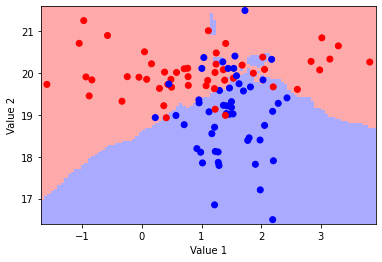

In [226]:
#Creating datasets
np.random.seed(25)

dataset_A = pd.DataFrame({'Value 1': np.random.normal(loc=1, scale=1, size=(100,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=20, scale=0.5, size=(100,1)).flatten().tolist(),
                          'Dataset': ['A' for i in range(100)]})
dataset_B = pd.DataFrame({'Value 1': np.random.normal(loc=1.5, scale=0.5, size=(100,1)).flatten().tolist(),
                          'Value 2': np.random.normal(loc=19, scale=1, size=(100,1)).flatten().tolist(),
                          'Dataset': ['B' for i in range(100)]})

#Set the train dataset
dataset_train = dataset_fusion(dataset_A[:50], dataset_B[:50])
#Set the test dataset
dataset_test = dataset_fusion(dataset_A.tail(50), dataset_B.tail(50))

X_train, y_train = dataset_train[columns_atrib].values, dataset_train[column_target].values
X_test, y_test = dataset_test[columns_atrib].values, dataset_test[column_target].values

#Transform the targets in variables that can be used in classifier training
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

#KNN classifier instance and training
knn = neighbors.KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

#Graphical settings
x_min, x_max = X_train[:, 0].min() - .1, X_train[:, 0].max() + .1
y_min, y_max = X_train[:, 1].min() - .1, X_train[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold)
plt.xlabel('Value 1')
plt.ylabel('Value 2')
plt.axis('tight')

#Find predictions using the variables from test dataset
prediction = knn.predict(X_test)

#Compute confuse matrix using the predictions made and compared with y test.
cm = metrics.confusion_matrix(y_test, prediction)

#Compute some metrics
TP, FP, FN, TN = cm[0,0], cm[1,0], cm[0,1], cm[1,1]
accuracy = (TP+TN)/(TP+FP+FN+TN)
precision_value1 = TP/(TP+FP)
precision_value2 = TN/(FN+TN)
recall = TP/(TP+FN)
f_meas = (2*precision_value1*recall)/(precision_value1+recall)
print('Accuracy:', accuracy)
print('Value 1 Predictive Value - Precision:', precision_value1)
print('Value 2 Predictive Value - Precision:', precision_value2)
print('Recall:', recall)
print('f-measure:', f_meas)

### The clustering is more difficult when the variables are more "mixed", as we can see in color map, it's hard to separate what is A and B.